
# 1 Rotation

1.1

$|(p+q)/2|=\sqrt{1/2+1/8+1/8}=\sqrt{3/4}\neq 1$

$r=\frac{(p+q)/2}{|(p+q)/2|}=\frac{\sqrt{6}}{3}(1+0.5i+0.5j)$

Since $q$ can be represented as $q=[cos(\theta/2),sin(\theta/2)\omega]$, the corresponding angle-axis representation is:

$\theta = 2arccos(\frac{\sqrt{6}}{3}) \approx 70.5°$

$\omega = \frac{1}{sin(\theta/2)} \frac{\sqrt{6}}{6} (1,1,0) = \frac{\sqrt{2}}{2}(1,1,0)$

So $M(r)$ rotates 70.5 degree around $\frac{\sqrt{2}}{2}(1,1,0)$

To find the rotation matrix, we can either solve exponential map or directly use the formula:

$[v]=\frac{\sqrt{6}}{6}
\begin{bmatrix}
0 & 0 & 1\\
0 & 0 & -1\\
-1 & 1 & 0
\end{bmatrix}$

$E(r)=[-v,wI+[v]]=\frac{\sqrt{6}}{6}
\begin{bmatrix}
-1 & 2  & 0 & 1\\
-1 & 0  & 2 & -1\\
0  & -1 & 1 & 2
\end{bmatrix}$

$G(r)=[-v,wI-[v]]=\frac{\sqrt{6}}{6}
\begin{bmatrix}
-1 & 2  & 0  & -1\\
-1 & 0  & 2  & 1\\
0  & 1  & -1 & 2
\end{bmatrix}$

$M(r)=R(r)G(r)^T=\frac{1}{6}
\begin{bmatrix}
4  & 2  & 4  \\
2  & 4  & -4 \\
-4 & 4  & 2 
\end{bmatrix}$

1.2

$p=(1+i)/\sqrt{2}$

$q=(1+j)/\sqrt{2}$

$\theta=2arccos(1/\sqrt{2})=90°=\pi/2$

$\hat{\omega}_p=\sqrt{2}(1/\sqrt{2},0,0)=(1,0,0)$

$\hat{\omega}_q=(0,1,0)$

So the exponential coordinates of p and q are $\pi/2(1,0,0)$ and $\pi/2(0,1,0)$

1.3.a

$[\omega] = 
\begin{bmatrix}
0 & -\omega _3 & \omega _2\\
\omega _3 & 0 & -\omega _1\\
-\omega _2 & \omega _1 & 0
\end{bmatrix}$

$e^{[\omega]\theta}=I+[\omega]sin\theta+[\omega]^2(1-cos\theta)$

$[\omega_p]=
\begin{bmatrix}
0 & 0 & 0\\
0 & 0 & -1\\
0 & 1 & 0
\end{bmatrix}$
,
$[\omega_p]^2=
\begin{bmatrix}
0 & 0 & 0\\
0 & -1 & 0\\
0 & 0 & -1
\end{bmatrix}$

$[\omega_q]=
\begin{bmatrix}
0 & 0 & 1\\
0 & 0 & 0\\
-1 & 0 & 0
\end{bmatrix}$
,
$[\omega_q]^2=
\begin{bmatrix}
-1 & 0 & 0\\
0 & 0 & 0\\
0 & 0 & -1
\end{bmatrix}$

$e^{[\omega_p]}=I+[\omega_p]+[\omega_p]^2=
\begin{bmatrix}
1 & 0 & 0\\
0 & 0 & -1\\
0 & 1 & 0
\end{bmatrix}$

$e^{[\omega_q]}=I+[\omega_q]+[\omega_q]^2=
\begin{bmatrix}
0 & 0 & 1\\
0 & 1 & 0\\
-1 & 0 & 0
\end{bmatrix}$

1.3.b

$[\omega_p]+[\omega_q]=
\begin{bmatrix}
0 & 0 & 1\\
0 & 0 & -1\\
-1 & 1 & 0
\end{bmatrix}$

It corresponds to a rotation vector with norm = $\theta = \sqrt{2}$, and the skew-symm matrix is
$[\omega]=
\frac{1}{\sqrt{2}}
\begin{bmatrix}
0 & 0 & 1\\
0 & 0 & -1\\
-1 & 1 & 0
\end{bmatrix}$

$[\omega]^2=
\frac{1}{2}
\begin{bmatrix}
-1 & 1  & 0\\
1  & -1 & 0\\
0  & 0  & -2
\end{bmatrix}$


Therefore,
$e^{[\omega]\theta}=I+[\omega]sin\theta+[\omega]^2(1-cos\theta)
\approx
\begin{bmatrix}
0.57 & 0.42 & 0.70\\
0.42 & 0.58 & -0.70\\
-0.70 & 0.70 & 0.16
\end{bmatrix}$

$\neq e^{[\omega_p]}e^{[\omega_q]}$

In conclusion, rotations are (generally) not commutative, so the formula is not true.

In [2]:
import numpy as np
w = np.array([[0,0,1],[0,0,-1],[-1,1,0]])
w2 = np.array([[-1,1,0],[1,-1,0],[0,0,-2]])
ans = np.identity(3) + np.sin(np.sqrt(2))/np.sqrt(2) * w + 0.5*(1-np.cos(np.sqrt(2))) * w2
ans

array([[ 0.57797185,  0.42202815,  0.698456  ],
       [ 0.42202815,  0.57797185, -0.698456  ],
       [-0.698456  ,  0.698456  ,  0.15594369]])

1.3.c

Suppose we have a fixed rotation $R_0$, and we want to find another rotation in its neighbourhood s.t minimize the loss. So the problem form is changed to (use hint):

$minimize_{\Delta\omega}$ $||R_0(I+[\Delta\omega])X-Y||^2_F$

$=||R_0[\Delta\omega]X+R_0X-Y||^2_F$

$=tr((R_0[\Delta\omega]X+R_0X-Y)^T(R_0[\Delta\omega]X+R_0X-Y))$

It is a least-square problem.

$L(\Delta\omega,\lambda)
=tr((R_0[\Delta\omega]X+R_0X-Y)^T(R_0[\Delta\omega]X+R_0X-Y))
+\lambda(\Delta\omega^T\Delta\omega-\epsilon)$

$\lambda \ge 0$

Note that trace is a linear operator, so commutative with derivative operator. The lie braket also represents a linear map (though its derivative is 3-dim, see https://math.stackexchange.com/questions/811049/what-is-the-derivative-of-a-skew-symmetric-matrix). Then the gradient of $L$ is:

$\frac{\partial{L}}{\partial{\Delta\omega}}
=2tr(R_0^T(R_0[\Delta\omega]X+R_0X-Y)X^T)\frac{\partial{[\Delta\omega]}}{\partial{\Delta\omega}} + 2\lambda\Delta\omega$

This gradient is not easy to handle, so we have to (following step 2) find the corresponding matrix $A$ and vector $B$ to similarize the problem.

Easy to notice $*\rightarrow R_0[*]X$ is a linear map, so the matrix A exists.

Let $R_0=
\begin{bmatrix}
r_{11} & r_{12} & r_{13}\\
r_{21} & r_{22} & r_{23}\\
r_{31} & r_{32} & r_{33}
\end{bmatrix}$

$X=
\begin{bmatrix}
... & x_i & ...\\
... & y_i & ...\\
... & z_i & ...
\end{bmatrix}$


Then
$R_0[\Delta\omega]X=
\begin{bmatrix}
... & (y_ir_{13}-z_ir_{12})\Delta\omega_1
+(z_ir_{11}-x_ir_{13})\Delta\omega_2
+(x_ir_{12}-y_ir_{11})\Delta\omega_3 & ...\\
... & (y_ir_{23}-z_ir_{22})\Delta\omega_1
+(z_ir_{21}-x_ir_{23})\Delta\omega_2
+(x_ir_{22}-y_ir_{21})\Delta\omega_3 & ...\\
... & (y_ir_{33}-z_ir_{32})\Delta\omega_1
+(z_ir_{31}-x_ir_{33})\Delta\omega_2
+(x_ir_{32}-y_ir_{31})\Delta\omega_3 & ...
\end{bmatrix}$

The Frobenius is equivalent to the L2 norm after ravelling the matrix.

So ravel the matrix we can find the A and B from the coefficients:

$A = A_1 - A_2$

$A_1 = 
\begin{bmatrix}
...\\
y_ir_{13} & z_ir_{11} & x_ir_{12}\\
y_ir_{23} & z_ir_{21} & x_ir_{22}\\
y_ir_{33} & z_ir_{31} & x_ir_{32}\\
...
\end{bmatrix}$

$A_2 = 
\begin{bmatrix}
...\\
z_ir_{12} & x_ir_{13} & y_ir_{11}\\
z_ir_{22} & x_ir_{23} & y_ir_{21}\\
z_ir_{32} & x_ir_{33} & y_ir_{31}\\
...
\end{bmatrix}$

$B=ravel(Y-R_0X)$ (we assume $Ax-B$ so an additional sign is added)

Then use the solution in hw0 we can get a $\Delta\omega$.

In [3]:
# Note Matplotlib is only suitable for simple 3D visualization.
# For later problems, you should not use Matplotlib to do the plotting
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
def show_points(points):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.set_xlim3d([-2, 2])
    ax.set_ylim3d([-2, 2])
    ax.set_zlim3d([0, 4])
    ax.scatter(points[0], points[2], points[1])
    
def compare_points(points1, points2):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.set_xlim3d([-2, 2])
    ax.set_ylim3d([-2, 2])
    ax.set_zlim3d([0, 4])
    ax.scatter(points1[0], points1[2], points1[1])
    ax.scatter(points2[0], points2[2], points2[1])    

C:\Users\不灭的~1\AppData\Local\Temp/ipykernel_12212/4240395084.py:16: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


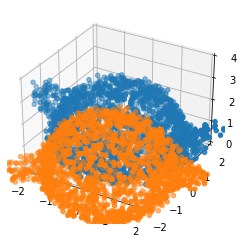

In [4]:
npz = np.load('HW1_P1.npz')
X = npz['X']
Y = npz['Y']
compare_points(X, Y)  # noisy teapotsand

In [9]:
# copy-paste your hw0 solve module here
def h(lamda,A,b):
    # note that mat+num means adding to all element in numpy
    return np.linalg.inv(A.T@A+2*lamda*np.identity(A.shape[1]))@A.T@b

def hw0_solve(A, b, eps):
    # unconstrained solution
    if np.sum(h(0,A,b)**2) < eps:
        return h(0,A,b)

    # constrained solution
    # first find a interval for lambda
    lo = 0
    hi = 1
    while np.sum(h(hi,A,b)**2) > eps:
        hi = 2*hi

    # then line search
    max_iter = 10000
    max_error = 1e-12
    for _ in range(max_iter):
        mi = (lo+hi)/2
        if hi - lo < 2 * max_error:
            return h(mi,A,b)
        if np.sum(h(mi,A,b)**2) > eps:
            lo = mi
        else: hi = mi

    print(f'iter limit reached...lambda={mi}')
    return h(mi,A,b)

In [20]:
R1 = np.eye(3)
# solve this problem here, and store your final results in R1
eps = 0.1 # random choice
for __ in range(100):
    A1 = R1[:,[2,0,1]].reshape(3,3,1) * X[[1,2,0]].reshape(1,3,-1)
    A2 = R1[:,[1,2,0]].reshape(3,3,1) * X[[2,0,1]].reshape(1,3,-1)
    # axis 0 and 2 should be ravelled together, only keeps axis 1 (see the formula above)
    A = (A1-A2).transpose(2,0,1).reshape(-1,3)
    B = (Y-R1@X).T.ravel()
    
    dw = hw0_solve(A,B,eps)
    theta = np.sqrt(np.sum(dw**2))
    omega = dw / theta
    skew = np.array([[0,-omega[2],omega[1]],[omega[2],0,-omega[0]],[-omega[1],omega[0],0]])

    R1 = R1@(np.identity(3)+skew*np.sin(theta)+skew@skew*(1-np.cos(theta)))


C:\Users\不灭的~1\AppData\Local\Temp/ipykernel_12212/4240395084.py:16: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


array([[1.00000000e+00, 1.60212256e-16, 1.91534876e-16],
       [1.60212256e-16, 1.00000000e+00, 1.05738234e-16],
       [1.91534876e-16, 1.05738234e-16, 1.00000000e+00]])

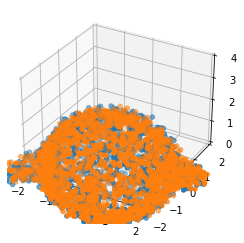

In [21]:
# Testing code, you should see the points of the 2 teapots roughly overlap
compare_points(R1@X, Y)
R1.T@R1

1.4.a

Begin with the last question. For any $x\in \mathbb{R}^3$ and quaternion $r$, rotated (augmented) coordinates are $rx_{augmented}r^{-1}$, so $(-r)x_{augmented}(-r)^{-1}=rx_{augmented}r^{-1}$, which means they represents the same rotation (double covering).

But angle-axis representation (exponential coods) is also not unique. The relationship is they're in opposite direction, and the sum of norm is $2\pi$:

$\theta(r) = 2arccos(w)$

$\omega(r) = 1/sin(\theta(r)/2)v$

So $\theta(-r) = 2arccos(-w) = 2\pi - \theta(r)$,
$\omega(r) = 1/sin(\theta(-r)/2)(-v) = -1/sin(\theta(r)/2)v$



So the exponential coordinates of -p and -q are $3\pi/2(-1,0,0)$ and $3\pi/2(0,-1,0)$

1.4.b

No. The number of local & global mininum points will be doubled, which will do harm to the stability and robustbility of optimization process.

Another reason is since r and -r is the same rotation, then they should be 'near' in gd. But if we use L2 loss they will be far.

# 2 Geometry

warm up: easy to verify that $x^2/a^2+y^2/b^2+z^2/c^2=1$

2.1

$p$ is some point in the domain, and will be mapped to some point in $\mathbb{R}^3$.

Since $v$ is a fixed vector, and $t\in (-1,1)$, then the curve $\gamma$ in domain is a segment with ends $p-v$ and $p+v$.

In $\mathbb{R}^3$, $f\circ\gamma$ can be an arc/closed curve/... **on** the surface of the ellipsoid (the specific shape is determined by $p$ and $v$).



$(f\circ\gamma)'(0)=f'(\gamma(0))\gamma'(0)=J_{p}v$, here $J_{p}$ means the Jacobian matrix of $f$ at $p\in$ domain. So it is a vector in the tangent plane of $f(p)$, and is also the tangent vector of the 3D curve $f\circ\gamma$ at $f(p)$.

An illustration: choose $p=v=(0,\pi/2)$:

$J_p=
\begin{bmatrix}
-asinusinv & acosucosv \\
bcosusinv  & bsinucosv \\
0          & -csinv
\end{bmatrix}$

<img src="image0.png">

In [1]:
a, b, c = 1, 1, 0.5

In [2]:
# These are some convenient functions to create open3d geometries and plot them
# The viewing direction is fine-tuned for this problem, you should not change them
import open3d
import numpy as np
import matplotlib.pyplot as plt

vis = open3d.visualization.Visualizer()
vis.create_window(visible = False)

def draw_geometries(geoms):
    for g in geoms:
        vis.add_geometry(g)
    view_ctl = vis.get_view_control()
    view_ctl.set_up((0, 1e-4, 1))
    view_ctl.set_front((0, 0.5, 2))
    view_ctl.set_lookat((0, 0, 0))
    # do not change this view point
    vis.update_renderer()
    img = vis.capture_screen_float_buffer(True)
    plt.figure(figsize=(8,6))
    plt.imshow(np.asarray(img)[::-1, ::-1])
    for g in geoms:
        vis.remove_geometry(g)
    
def create_arrow_from_vector(origin, vector):
    '''
    origin: origin of the arrow
    vector: direction of the arrow
    '''
    v = np.array(vector)
    v /= np.linalg.norm(v)
    z = np.array([0,0,1])
    angle = np.arccos(z@v)
    
    arrow = open3d.geometry.TriangleMesh.create_arrow(0.05, 0.1, 0.25, 0.2)
    arrow.paint_uniform_color([1,0,1])
    T = np.eye(4)
    T[:3, 3] = np.array(origin)
    T[:3,:3] = open3d.geometry.get_rotation_matrix_from_axis_angle(np.cross(z, v) * angle)
    arrow.transform(T)
    return arrow

def create_ellipsoid(a,b,c):
    sphere = open3d.geometry.TriangleMesh.create_sphere()
    sphere.transform(np.diag([a,b,c,1]))
    sphere.compute_vertex_normals()
    return sphere


def create_lines(points):
    lines = []
    for p1, p2 in zip(points[:-1], points[1:]):
        height = np.linalg.norm(p2-p1)
        center = (p1+p2) / 2
        d = p2-p1
        d /= np.linalg.norm(d)
        axis = np.cross(np.array([0,0,1]), d)
        axis /= np.linalg.norm(axis)
        angle = np.arccos(np.array([0,0,1]) @ d)
        R = open3d.geometry.get_rotation_matrix_from_axis_angle(axis * angle)
        
        T = np.eye(4)
        T[:3,:3]=R
        T[:3,3] = center
        cylinder = open3d.geometry.TriangleMesh.create_cylinder(0.02, height)
        cylinder.transform(T)
        cylinder.paint_uniform_color([1,0,0])
        lines.append(cylinder)
    return lines

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


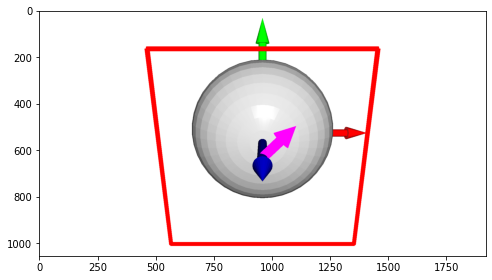

In [3]:
# exapmle code to draw ellipsoid, curve, and arrows
arrow = create_arrow_from_vector([0.,0.,1.], [1.,1.,0.])
ellipsoid = create_ellipsoid(a, b, c)
cf = open3d.geometry.TriangleMesh.create_coordinate_frame()
cf.scale(1.5, (0,0,0))
curve = create_lines(np.array([[1,1,1], [-1,1,1], [-1,-1,1], [1,-1,1], [1,1,1]], dtype=np.float64))
draw_geometries([ellipsoid, cf, arrow] + curve)

2.2 your solution here

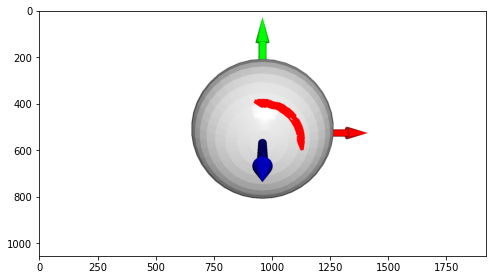

In [4]:
# sample points
def f(pts):
    # pts.shape=(n,2)
    u,v = pts[:,0], pts[:,1]
    return np.stack([a*np.cos(u)*np.sin(v),b*np.sin(u)*np.sin(v),c*np.cos(v)]).T
p = np.array([np.pi/4,np.pi/6])
v_vec = np.array([1,0])
R2_pts = p.reshape(1,-1) + (2*np.random.rand(50)-1).reshape(-1,1)*v_vec
R3_pts = f(R2_pts)

ellipsoid = create_ellipsoid(a, b, c)
cf = open3d.geometry.TriangleMesh.create_coordinate_frame()
cf.scale(1.5, (0,0,0))
curve = create_lines(R3_pts)
draw_geometries([ellipsoid, cf] + curve)

2.3.a

This is done in 2.1:

$J_p=
\begin{bmatrix}
-asinusinv & acosucosv \\
bcosusinv  & bsinucosv \\
0          & -csinv
\end{bmatrix}$

2.3.b

The 2 column vector in $Df_p$ is 2 tangent vectors of the surface at point $p$. Their spanning is the tangent plane.

2.3.c

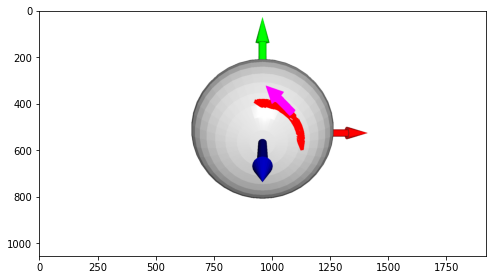

In [8]:
u,v = p[0], p[1]
Jacobi = np.array([[-a*np.sin(u)*np.sin(v), a*np.cos(u)*np.cos(v)],\
    [b*np.cos(u)*np.sin(v), b*np.sin(u)*np.cos(v)],\
    [0, -c*np.sin(v)]])
tangent = Jacobi@v_vec
arrow = create_arrow_from_vector(f(p.reshape(1,-1)).squeeze(), tangent)
# here 'create_arrow_from_vector' func prarm2 is simply the vector at param1 frame, so no additional moving needed

ellipsoid = create_ellipsoid(a, b, c)
cf = open3d.geometry.TriangleMesh.create_coordinate_frame()
cf.scale(1.5, (0,0,0))
curve = create_lines(R3_pts)
draw_geometries([ellipsoid, cf, arrow] + curve)

2.3.d

The normal is (normalized) cross product of 2 basis in Jacobian (see below).

In [10]:
tangent0, tangent1 = Jacobi[:,0], Jacobi[:,1]
ans = np.cross(tangent0,tangent1)
ans = ans / np.linalg.norm(ans)
print(ans)

[-0.19611614 -0.19611614 -0.96076892]


2.3.e

Do Gram-Schmit is enough.

[[-0.35355339  0.61237244]
 [ 0.35355339  0.61237244]
 [ 0.         -0.25      ]]


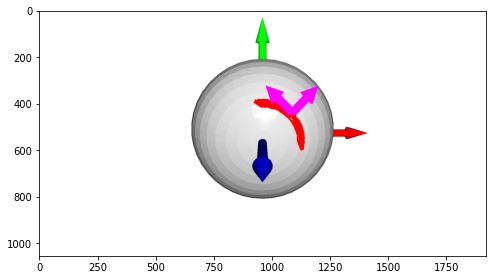

In [11]:
print(Jacobi)
tangent_orth = tangent1 - (tangent0@tangent1) * tangent0 / (tangent0@tangent0)

arrow0 = create_arrow_from_vector(f(p.reshape(1,-1)).squeeze(), tangent0)
arrow_orth = create_arrow_from_vector(f(p.reshape(1,-1)).squeeze(), tangent_orth)

ellipsoid = create_ellipsoid(a, b, c)
cf = open3d.geometry.TriangleMesh.create_coordinate_frame()
cf.scale(1.5, (0,0,0))
curve = create_lines(R3_pts)
draw_geometries([ellipsoid, cf, arrow0, arrow_orth] + curve)

2.4.a

The expression of $g_v(t)$ is:

$\begin{bmatrix}
acos(\frac{\pi}{4}+t)sin(\frac{\pi}{6})   \\
bsin(\frac{\pi}{4}+t)sin(\frac{\pi}{6})   \\
ccos(\frac{\pi}{6})        
\end{bmatrix}$

$=
\begin{bmatrix}
0.5cos(\frac{\pi}{4}+t)   \\
0.5sin(\frac{\pi}{4}+t)   \\
0.25\sqrt{3}
\end{bmatrix}
$

So it's a circle arc with angle = $t$ (rad), radius = $0.5$.

$s(t)=\frac{t}{2\pi}2\pi*0.5=0.5t$

2.4.b

$t(s) = 2s$

$h_v(s)=f\circ\gamma=
\begin{bmatrix}
0.5cos(\frac{\pi}{4}+2s)   \\
0.5sin(\frac{\pi}{4}+2s)   \\
0.25\sqrt{3}
\end{bmatrix}
$

2.4.c

$T(s) = 
\begin{bmatrix}
-sin(\frac{\pi}{4}+2s)   \\
cos(\frac{\pi}{4}+2s)   \\
0
\end{bmatrix}
$

$N(s)=T'(s)/||T'(s)|| = 
\begin{bmatrix}
-cos(\frac{\pi}{4}+2s)   \\
-sin(\frac{\pi}{4}+2s)   \\
0
\end{bmatrix}
$

*(Another vector in 3d is binormal vector)*

2.5.a

$J_p=
\begin{bmatrix}
-asinusinv & acosucosv \\
bcosusinv  & bsinucosv \\
0          & -csinv
\end{bmatrix}$
$=
\begin{bmatrix}
-sinusinv & cosucosv \\
cosusinv  & sinucosv \\
0          & -0.5sinv
\end{bmatrix}$

$N_p=normalize(
\begin{bmatrix}
-asinusinv \\
bcosusinv  \\
0         
\end{bmatrix}
\times
\begin{bmatrix}
acosucosv  \\
bsinucosv  \\
-csinv 
\end{bmatrix}
)$

$=
\begin{bmatrix}
-bccosusin^2v \\
-acsinusin^2v \\
absinvcosv
\end{bmatrix}
/
||
\begin{bmatrix}
-bccosusin^2v \\
-acsinusin^2v \\
absinvcosv
\end{bmatrix}
||
$

$=
\frac{-1}{\sqrt{\sin ^{2} v+4 \cos ^{2} v}}\left[\begin{array}{c}
\cos u \sin v \\
\sin u \sin v \\
2 \cos v
\end{array}\right]
$

2.5.b

$D N_{p}=\left[\begin{array}{cc}
\frac{\sin u \sin v}{\sqrt{\sin ^{2} v+4 \cos ^{2} v}} & -\frac{4 \cos u \cos v}{\left(4 \cos ^{2}v+\sin ^{2}v\right)^{3 / 2}} \\
-\frac{\cos u \sin v}{\sqrt{\sin ^{2} v+4 \cos ^{2} v}} & -\frac{4 \cos v \sin u}{\left(4 \cos ^{2}v+\sin ^{2}v\right)^{3 / 2}} \\
0 & \frac{2 \sin v}{\left(4 \cos ^{2}v+\sin ^{2}v\right)^{3 / 2}}
\end{array}\right]$

Since shape operator $S$ satisfies $DN_p=Df_pS$, so we can exactly solve the $S$:

$
S=
\begin{bmatrix}
-\frac{1}{\sqrt{sin^2v+4cos^2v}} & 0 \\
0 & -\frac{4}{(4cos^2v+sin^2v)^{3/2}}
\end{bmatrix}
$

So $S$ is diagonal, thus eigenvectors are $(1,0),(0,1)$.

2.5.c

The principal curvature directions are the tangent direction of curves corresponding to the eigenvalues.

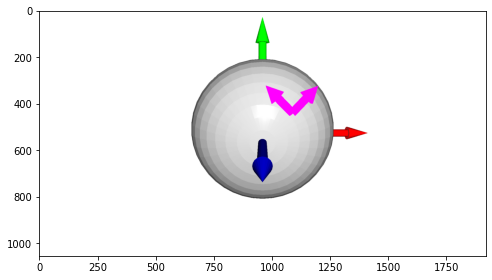

In [14]:
eigenv0 = np.array([[1],[0]])
eigenv1 = np.array([[0],[1]])

eigen0_3d = (Jacobi@eigenv0).ravel()
eigen1_3d = (Jacobi@eigenv1).ravel()


eigen0_arrow=create_arrow_from_vector(f(p.reshape(1,-1)).squeeze(), eigen0_3d)
eigen1_arrow=create_arrow_from_vector(f(p.reshape(1,-1)).squeeze(), eigen1_3d)

ellipsoid = create_ellipsoid(a, b, c)
cf = open3d.geometry.TriangleMesh.create_coordinate_frame()
cf.scale(1.5, (0,0,0))
draw_geometries([ellipsoid, cf, eigen0_arrow, eigen1_arrow])


2.5.d

They represents the largest and smallest directional curvature.

# 3 Mesh

3.1

$\kappa_p(t_{\theta})$ means the directional normal culvature in direction of $t_{\theta}$, so is a real number.

Then since normal at p is invariant of $\theta$, 
$M_pN_p=\frac{1}{2\pi}\int^{\pi}_{-\pi}\kappa_p(t_{\theta})t_{\theta}t^T_{\theta}N_pd\theta=0$.

So normal is an eigenvector of $M_p$ with eigenvalue 0.

3.2

Principal curvature directions are also invariant of $\theta$. (Also notice that they're orthogonal)

$M_pT_1=
\frac{1}{2\pi}\int^{\pi}_{-\pi}\kappa_p(t_{\theta})t_{\theta}t^T_{\theta}T_1d\theta$

$=
\frac{1}{2\pi}\int^{\pi}_{-\pi}(\kappa_p^1cos^2\theta+\kappa_p^2sin^2\theta)(cos\theta T_1+sin\theta T_2)(cos\theta T_1+sin\theta T_2)^TT_1d\theta
$

$=
\frac{1}{2\pi}\int^{\pi}_{-\pi}(\kappa_p^1cos^2\theta+\kappa_p^2sin^2\theta)cos^2\theta T_1d\theta
$

(odd part ($T_2$ term) is 0)


$=
T_1\frac{1}{2\pi}\int^{\pi}_{-\pi}(\kappa_p^1cos^4\theta+\kappa_p^2sin^2\theta cos^2\theta)d\theta
$

Integral by parts will derive:

$\int^{\pi}_{-\pi}cos^4\theta d\theta=3\pi/4$
$\int^{\pi}_{-\pi}cos^2\theta sin^2\theta d\theta=\pi/4$

So the fomula above $=T_1(3\kappa_p^1/8+\kappa_p^2/8)$, $T_1$ is an eigenvector with eigenvalue $(3\kappa_p^1/8+\kappa_p^2/8)$

$M_pT_2=
\frac{1}{2\pi}\int^{\pi}_{-\pi}\kappa_p(t_{\theta})t_{\theta}t^T_{\theta}T_2d\theta$

$=
\frac{1}{2\pi}\int^{\pi}_{-\pi}(\kappa_p^1cos^2\theta+\kappa_p^2sin^2\theta)(cos\theta T_1+sin\theta T_2)(cos\theta T_1+sin\theta T_2)^TT_2d\theta
$

$=
T_2\frac{1}{2\pi}\int^{\pi}_{-\pi}(\kappa_p^1cos^2\theta sin^2\theta+\kappa_p^2sin^4\theta)d\theta
$

So similarly $T_2$ is an eigenvector with eigenvalue $(\kappa_p^1/8+3\kappa_p^2/8)$

3.3 your solution here

In [3]:
# You may want to restart your notebook here, to reinitialize Open3D

import open3d
import numpy as np
import matplotlib.pyplot as plt

vis = open3d.visualization.Visualizer()
vis.create_window(visible = False)

# Make sure you call this function to draw the points for proper viewing direction
def draw_geometries(geoms):
    for g in geoms:
        vis.add_geometry(g)
    view_ctl = vis.get_view_control()
    view_ctl.set_up((0, 1, 0))
    view_ctl.set_front((0, 2, 1))
    view_ctl.set_lookat((0, 0, 0))
    view_ctl.set_zoom(1)
    # do not change this view point
    vis.update_renderer()
    img = vis.capture_screen_float_buffer(True)
    plt.figure(figsize=(8,6))
    plt.imshow(np.asarray(img))
    for g in geoms:
        vis.remove_geometry(g)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


Text(0.5, 1.0, "Sievert's surface")

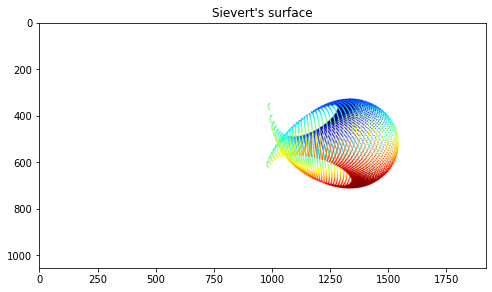

In [4]:
import trimesh
mesh = trimesh.load('sievert.obj')
pcd = open3d.geometry.PointCloud()
pcd.points = open3d.utility.Vector3dVector(mesh.vertices)
draw_geometries([pcd])
plt.title("Sievert's surface")

Text(0.5, 1.0, "Saddle's surface")

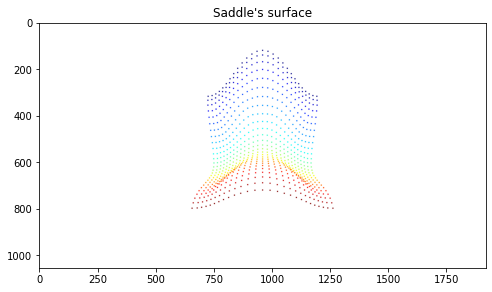

In [13]:
import trimesh
mesh = trimesh.load('saddle.obj')
pcd = open3d.geometry.PointCloud()
pcd.points = open3d.utility.Vector3dVector(mesh.vertices)
draw_geometries([pcd])
plt.title("Saddle's surface")

In [5]:
print(mesh.faces.shape)
print(mesh.vertices.shape)
print(mesh.vertex_normals.shape)

(20000, 3)
(10201, 3)
(10201, 3)


In [12]:
mesh1,mesh2 = trimesh.load('sievert.obj'),trimesh.load('saddle.obj')

def curv(mesh):
    principal_curvatures = []
    for i,face in enumerate(mesh.faces):
        p0,p1,p2 = mesh.vertices[face[0]],mesh.vertices[face[1]],mesh.vertices[face[2]]
        e0,e1,e2 = p2-p1,p0-p2,p1-p0
        n0,n1,n2 = mesh.vertex_normals[face[0]],mesh.vertex_normals[face[1]],mesh.vertex_normals[face[2]]
        # find Df
        ku = e0 / np.linalg.norm(e0)
        kv = e1 - ((e1@e0)/(e0@e0))*e0
        kv /= np.linalg.norm(kv)
        Df = np.stack((ku,kv)).T
        # ls
        A = []
        for e in (e0,e1,e2):
            v = Df.T@e
            A.append(np.array([[v[0],v[1],0,0],[0,0,v[0],v[1]]]))
        A = np.array(A).reshape(-1,4)
        b = np.stack((Df.T@(n2-n1),Df.T@(n0-n2),Df.T@(n1-n0))).reshape(-1)
        S_ravel = np.linalg.lstsq(A,b,rcond=None)[0]
        S = S_ravel.reshape(2,2)
        # eigenvalue
        kappa_pair,_ = np.linalg.eig(S)
        principal_curvatures.append(kappa_pair)
    return np.array(principal_curvatures)

pc1 = curv(mesh1)
pc2 = curv(mesh2)

3.4

For a sphere with radius $r$, the Gaussian curvature is $1/r^2$ (constant), and the mean curvature is $2/r$ (constant).

<BarContainer object of 20 artists>

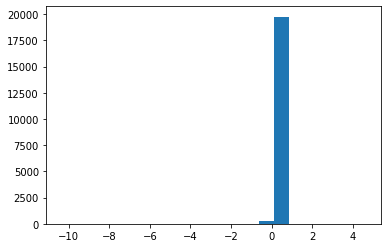

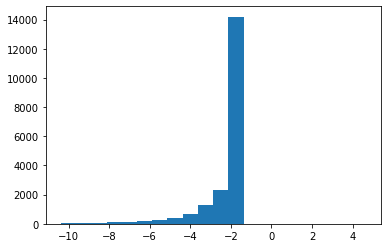

In [20]:
gaussian_cur = pc1[:,0]*pc1[:,1]
hist_data, bin_edges = np.histogram(gaussian_cur, 20,(-10,5))
fig, ax = plt.subplots()
ax.bar(bin_edges[:-1], hist_data, width=np.diff(bin_edges))


mean_cur = (pc1[:,0]+pc1[:,1])/2
hist_data, bin_edges = np.histogram(mean_cur, 20,(-10,5))
fig, ax = plt.subplots()
ax.bar(bin_edges[:-1], hist_data, width=np.diff(bin_edges))

So the Gaussian curvature is nearly a constant with some numerical error, which means they are locally isometric. But mean curvature has a wider range, so their local geometry is not the same.

# 4 Point Cloud

4.1 your solution here

In [22]:
mesh = trimesh.load('saddle.obj')
ptcloud, face_idx = trimesh.sample.sample_surface(mesh,100000)
print(ptcloud.shape)

(100000, 3)


4.2 your solution here

In [30]:
def FPS(ptcloud,count):
    U = ptcloud
    S = []
    dist_to_S = np.full(len(U),np.inf)
    
    newpt_idx = 0

    for _ in range(count):
        S.append(U[newpt_idx])
        dist_offer = np.sum((U - U[newpt_idx])**2,axis=1)
        dist_to_S = np.min(np.stack((dist_offer,dist_to_S)),axis=0)
        # find new point
        newpt_idx = np.argmax(dist_to_S)
    
    return np.array(S)

ptcloud_fps = FPS(ptcloud,4000)

4.3 your solution here

In [36]:
import heapq
from tqdm import tqdm
def find_normal(pt):
    dist = np.sum((ptcloud - pt)**2,axis=1)
    neighbour_idx = heapq.nlargest(50,range(len(ptcloud)), key=lambda x: dist[x])
    neighbours = ptcloud[neighbour_idx]
    w,v=np.linalg.eig(neighbours.T@neighbours)
    normal = v[:,np.argmin(w)]
    if normal[1]<0 : normal*=-1
    return normal/np.linalg.norm(normal)

normals = []
for pt in tqdm(ptcloud_fps):
    normal = find_normal(pt)
    normals.append(normal)
normals = np.array(normals)
print(normals.shape)

100%|██████████| 4000/4000 [01:58<00:00, 33.69it/s]

(4000, 3)


4.4 your solution here

I think i can first transform pt cloud to triangular mesh, then apply Rusinkiewicz's method.

(Or treat neighbours as a mesh!!! (a more resaonable way))